# Drawing / Plotting
1. [Polylines](#polyline)
1. [Rectangle](#rectangle)
1. [Conic](#conic)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Polyline
It requires an array of points to draw polyline, and the array type must be np.int32.

points1 and points2 = an array of points = shape: (3, 1, 2) (4, 1, 2)
polylines = a colloection of polylines or an array of points or a vertice = shape: 2


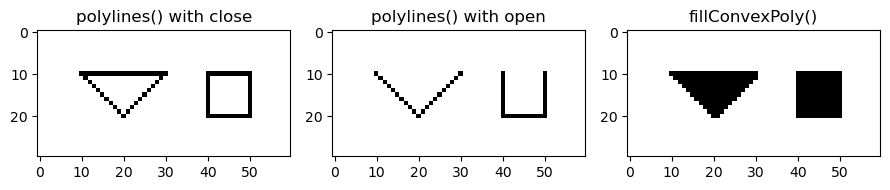

(None, None)

In [3]:
# Init polylines.
points1 = np.array([
    [[10,10]],
    [[20,20]],
    [[30,10]]
], np.int32)
points2 = np.array([
    [[40,10]],
    [[40,20]],
    [[50,20]],
    [[50,10]]
], np.int32)
print("points1 and points2 = an array of points = shape:", points1.shape, points2.shape )
polylines = [points1, points2]
print("polylines = a colloection of polylines or an array of points or a vertice = shape:", len(polylines))

# Bounding box.
boundingPoint1 = np.min(np.concatenate([np.min(poly, 0) for poly in polylines]), 0)
boundingPoint2 = np.max(np.concatenate([np.max(poly, 0) for poly in polylines]), 0)

# Draw contour.
img = np.ones((boundingPoint2[1]+10, boundingPoint2[0]+10), np.uint8)
# NOTE polylines() requries a list of polylines.
# NOTE set isClose argument to True to draw polyline in a closed loop.
img = cv2.polylines(img, polylines, True, 0, 1)
plt.figure(figsize=(9,2))
plt.subplot(1,3,1), plt.imshow(img, 'gray'), plt.title("polylines() with close")

# Draw outline.
img = np.ones((boundingPoint2[1]+10, boundingPoint2[0]+10), np.uint8)
# NOTE set isClose argument to False to draw polyline in a open loop.
img = cv2.polylines(img, polylines, False, 0, 1)
plt.subplot(1,3,2), plt.imshow(img, 'gray'), plt.title("polylines() with open")

# Draw filled shape.
img = np.ones((boundingPoint2[1]+10, boundingPoint2[0]+10), np.uint8)
# NOTE fillConvexPoly() requires a single polyline.
for poly in polylines:
    img = cv2.fillConvexPoly(img, poly, 0, 1)
plt.subplot(1,3,3), plt.imshow(img, 'gray'), plt.title("fillConvexPoly()")
plt.tight_layout(), plt.show()
 

## Rectangle
4 Options:
1. 2 Points
1. Rect
1. Polylines from boxPoints
1. Polylines from rotateRect.points()

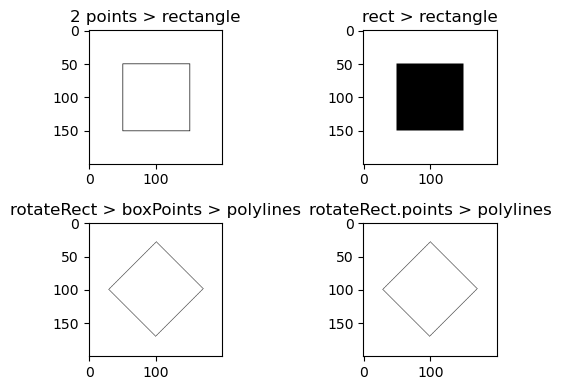

(None, None)

In [4]:
# properties
imgSize = (200,200)
p1, p2 = [50,50], [150,150]
w, h = 100, 100
center = [100,100]
angle = 45

# Option 1: 2 point inputs.
img = np.ones(imgSize, np.uint8)
img = cv2.rectangle(img, p1, p2, 0, 1)
plt.figure(figsize=(6,4))
plt.subplot(2,2,1), plt.imshow(img, 'gray'), plt.title("2 points > rectangle")

# Option 2: rect input.
img = np.ones(imgSize, np.uint8)
rect = p1 + [w] + [h]
# NOTE can give thinkness as -1 or cv2.FILLED for filling color.
img = cv2.rectangle(img, rect, 0, cv2.FILLED)
plt.subplot(2,2,2), plt.imshow(img, 'gray'), plt.title("rect > rectangle")

# Option 3: rotateRect input.
rotateRect = cv2.RotatedRect(center, (w,h), angle)
points = cv2.boxPoints(rotateRect).astype(np.int32)
img = np.ones(imgSize, np.uint8)
img = cv2.polylines(img, [points], True, 0, 1)
plt.subplot(2,2,3), plt.imshow(img, 'gray'), plt.title("rotateRect > boxPoints > polylines")

# Option 4: rotateRect input.
rotateRect = cv2.RotatedRect(center, (w,h), angle)
points = rotateRect.points().astype(np.int32)
img = np.ones(imgSize, np.uint8)
img = cv2.polylines(img, [points], True, 0, 1)
plt.subplot(2,2,4), plt.imshow(img, 'gray'), plt.title("rotateRect.points > polylines")

plt.tight_layout(), plt.show()

## Conic
>  **Tips:**
>
> Area formula for circle and ellipse are similar!
>
> <img src="https://cdn1.byjus.com/wp-content/uploads/2018/11/maths/2016/06/06051212/ellipse.png" height=100 />
>
> Circle area = `PI * R^2`
>
> Ellipse area = `PI * a/2 * b/2`

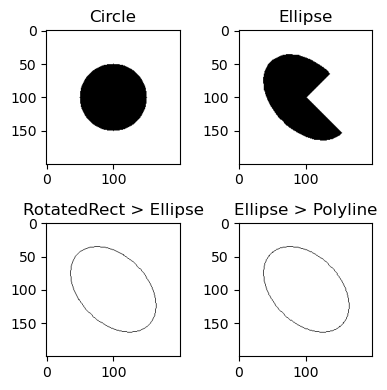

(None, None)

In [20]:
# Properties
imgSize = (200,200)
center = (100,100)
radius = 50
w, h = 150,100
angle = 45
startAngle = 0
endAngle = 270

# Draw circle.
img = np.ones(imgSize, np.uint8)
# NOTE can give thinkness as -1 or cv2.FILLED for filling color.
img = cv2.circle(img, center, radius, 0, cv2.FILLED)
plt.figure(figsize=(4,4))
plt.subplot(2,2,1), plt.imshow(img, 'gray'), plt.title("Circle")

# Draw ellipse option 1.
img = np.ones(imgSize, np.uint8)
# NOTE can give thinkness as -1 or cv2.FILLED for filling color.
# NOTE ellipse()'s size argument takes radius across an ellipse along its axises
img = cv2.ellipse(img, center, (w//2, h//2), angle, startAngle, endAngle, 0, cv2.FILLED)
# image = cv2.ellipse(img, ((400, 400), (400, 200) , 45), 0, 1) 
plt.subplot(2,2,2), plt.imshow(img, 'gray'), plt.title("Ellipse")

# Draw ellipse option 2: rotateRect.
img = np.ones(imgSize, np.uint8)
# NOTE RotatedRect()'s size argument take diameter across an ellipse along its axises
rotateRect = cv2.RotatedRect(center, (w, h), angle)
img = cv2.ellipse(img, rotateRect, 0, 1)
plt.subplot(2,2,3), plt.imshow(img, 'gray'), plt.title("RotatedRect > Ellipse")

# Draw ellipse option 3: polyline.
img = np.ones(imgSize, np.uint8)
# NOTE ellipse2Poly()'s size argument takes radius across an ellipse along its axises
points = cv2.ellipse2Poly(center, (w//2,h//2), angle, 0, 360, 1).astype(np.int32)
img = cv2.polylines(img, [points], True, 0, 1)
plt.subplot(2,2,4), plt.imshow(img, 'gray'), plt.title("Ellipse > Polyline")

plt.tight_layout(), plt.show()